In [5]:
from bluesky import RunEngine
from bluesky import Msg
from bluesky.plan_stubs import *
from IPython import get_ipython
user_ns = get_ipython().user_ns
from bluesky.preprocessors import SupplementalData
import bluesky.plans
from databroker import Broker
from epics import caget, caput, cainfo
from bluesky.plans import count, scan, list_grid_scan, grid_scan
from bluesky.preprocessors import SupplementalData
from ophyd.sim import det1, det2, det3, det4, motor1, motor2, motor, det

RE = RunEngine({})

from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

#Get the databroker https://gist.github.com/untzag/53281819709b1058c7708a250cbd3676
from databroker.v2 import temp
db = temp()

# Insert all metadata/data captured into db.
RE.subscribe(db.v1.insert)

from tqdm import tqdm
from bluesky.utils import ProgressBarManager, ProgressBar

#from bluesky.utils.jupyter import pbar_manager_for_notebook
#RE.waiting_hook = pbar_manager_for_notebook()

#ProgressBarManager(delay_draw=0.1)
#RE.subscribe(watch)

#RE.waiting_hook = ProgressBarManager()

#RE.waiting_hook = ProgressBa
#sd = SupplementalData()
#RE.preprocessors.append(sd)


In [6]:
from bluesky.plans import count
from bluesky.preprocessors import pchain
from bluesky.plan_stubs import pause
from ophyd.sim import det



Transient Scan ID: 1     Time: 2021-07-22 12:22:24
Persistent Unique Scan ID: 'd5896594-6726-44b8-98c7-9c230d1c8954'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |       det3 |
+-----------+------------+------------+------------+
|         1 | 12:22:24.7 |    -10.000 |      1.213 |
|         2 | 12:22:24.8 |     -8.571 |      1.213 |
|         3 | 12:22:24.8 |     -7.143 |      1.213 |
|         4 | 12:22:24.9 |     -5.714 |      1.213 |
|         5 | 12:22:24.9 |     -4.286 |      1.213 |
|         6 | 12:22:24.9 |     -2.857 |      1.213 |
|         7 | 12:22:25.0 |     -1.429 |      1.213 |
|         8 | 12:22:25.0 |      0.000 |      1.213 |
|         9 | 12:22:25.1 |      1.429 |      1.213 |
|        10 | 12:22:25.1 |      2.857 |      1.213 |
|        11 | 12:22:25.1 |      4.286 |      1.213 |
|        12 | 12:22:25.2 |      5.714 |      1.213 |
|        13 | 12:22:25.2 |      7.143 |      1.213 |
|        14

('d5896594-6726-44b8-98c7-9c230d1c8954',)

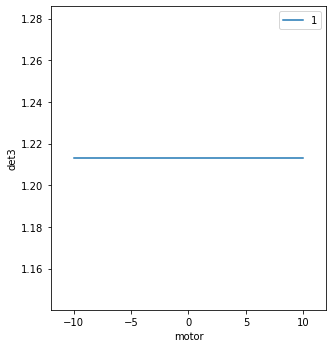

In [6]:
RE(scan([det3], motor, -10, 10, 15))

In [7]:
from ophyd import PVPositioner, EpicsSignal, EpicsSignalRO, Device, DerivedSignal
from ophyd import Component as Cpt


class Ring(Device):
    
    """
    Object to query machine BESSY II Beam status.   
    """
        
    current  = Cpt(EpicsSignalRO,      'current',   kind="hinted", labels={"detectors"})
    lifetime = Cpt(EpicsSignalRO,      'lt10',      kind="hinted"                      )
    
    
class RingInj(Device):
    next_inj_cdwn = Cpt(EpicsSignalRO,  'estCntDwnS', kind="hinted")
    inj_b_current = Cpt(EpicsSignalRO,  'rdCurrentB', kind="hinted")
    

In [8]:
bessy2 = Ring('MDIZ3T5G:', name='ring')
bessy2_parameter = RingInj('TOPUPCC:', name='bessy2_parameter')

In [9]:
bessy2.current.get()

297.6451546

In [4]:
bessy2.describe()

NameError: name 'bessy2' is not defined

In [28]:
bessy_current = bessy2.current.get()

In [38]:
ring_current1  = EpicsSignalRO('MDIZ3T5G:current',name='ring_current')

In [39]:
ring_current1

EpicsSignalRO(read_pv='MDIZ3T5G:current', name='ring_current', timestamp=1626951796.795559, auto_monitor=False, string=False)

In [39]:
ring_next_inj_cdn = EpicsSignalRO('TOPUPCC:log11',kind="hinted",name='ring_next_inj_cdn')

In [40]:
ring_next_inj_cdn.get()

'TopUp Off'

In [77]:
ring_next_inj_cdn_some = EpicsSignalRO('TOPUPCC:rdCurrentB',kind="hinted",name='ring_next_inj_cdn_some')

In [85]:
ring_next_inj_cdn_some.get()

2.7646589027013038

Suspender SuspendFloor(EpicsSignalRO(read_pv='MDIZ3T5G:current', name='ring_current', parent='ring', value=297.9618265, timestamp=1626955550.05606, auto_monitor=False, string=False), sleep=0, pre_plan=None, post_plan=None,tripped_message=) reports a return to nominal conditions. Will sleep for 0 seconds and then release suspension at 2021-07-22 14:05:50.
Suspender SuspendFloor(EpicsSignalRO(read_pv='MDIZ3T5G:current', name='ring_current', parent='ring', value=297.9061963, timestamp=1626955709.586916, auto_monitor=False, string=False), sleep=0, pre_plan=None, post_plan=None,tripped_message=) reports a return to nominal conditions. Will sleep for 0 seconds and then release suspension at 2021-07-22 14:08:29.
Suspender SuspendFloor(EpicsSignalRO(read_pv='MDIZ3T5G:current', name='ring_current', parent='ring', value=297.9614279, timestamp=1626955870.212667, auto_monitor=False, string=False), sleep=0, pre_plan=None, post_plan=None,tripped_message=) reports a return to nominal conditions. Will

In [35]:
type(bessy_current)

float

In [4]:
import datetime;
 

timestamp = datetime.datetime.now()
print("current time:-", timestamp)

current time:- 2021-07-22 13:21:23.833859


In [40]:
import time
for i in range(10):
    time.sleep(1)
    timestamp = datetime.datetime.now()
    bessy_current = bessy2.current
    print(f'Bessy current at {timestamp}: {bessy_current}')

Bessy current at 2021-07-22 13:09:47.045287: EpicsSignalRO(read_pv='MDIZ3T5G:current', name='ring_current', parent='ring', value=297.0623994, timestamp=1626951796.795559, auto_monitor=False, string=False)
Bessy current at 2021-07-22 13:09:48.046694: EpicsSignalRO(read_pv='MDIZ3T5G:current', name='ring_current', parent='ring', value=297.0623994, timestamp=1626951796.795559, auto_monitor=False, string=False)
Bessy current at 2021-07-22 13:09:49.048035: EpicsSignalRO(read_pv='MDIZ3T5G:current', name='ring_current', parent='ring', value=297.0623994, timestamp=1626951796.795559, auto_monitor=False, string=False)
Bessy current at 2021-07-22 13:09:50.049372: EpicsSignalRO(read_pv='MDIZ3T5G:current', name='ring_current', parent='ring', value=297.0623994, timestamp=1626951796.795559, auto_monitor=False, string=False)
Bessy current at 2021-07-22 13:09:51.050694: EpicsSignalRO(read_pv='MDIZ3T5G:current', name='ring_current', parent='ring', value=297.0623994, timestamp=1626951796.795559, auto_moni

In [5]:
from ophyd import EpicsSignal
from bluesky.suspenders import SuspendFloor

beam_current = bessy2.current
sus = SuspendFloor(beam_current, 297.3, resume_thresh=297.35)
RE.install_suspender(sus)

In [9]:
RE(count([det3], 100, delay = 2))

RuntimeError: The RunEngine is in a paused state

In [99]:
RE.stop()

Stopping: running cleanup and marking exit_status as 'success'...
+-----------+------------+------------+
generator count ['e4a46588'] (scan num: 4)





('e4a46588-e8b8-4a49-aa01-424183b00554',)

In [100]:
RE.remove_suspender(sus)



Transient Scan ID: 4     Time: 2021-07-22 14:22:39
Persistent Unique Scan ID: 'e4a46588-e8b8-4a49-aa01-424183b00554'
New stream: 'primary'
+-----------+------------+------------+
|   seq_num |       time |       det3 |
+-----------+------------+------------+
|         1 | 14:22:39.9 |      1.213 |
|         2 | 14:22:40.4 |      1.213 |
|         3 | 14:22:40.9 |      1.213 |
|         4 | 14:22:41.4 |      1.213 |
|         5 | 14:22:41.9 |      1.213 |
|         6 | 14:22:42.4 |      1.213 |
A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.Deferred pause acknowledged. Continuing to checkpoint.

trying a second time
Pausing...


RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


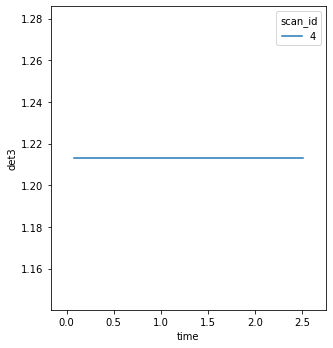

In [98]:
## focus on next injection in approx. time



from ophyd import EpicsSignal
from bluesky.suspenders import SuspendFloor

beam_current = bessy2.current
beam_next_inj = bessy2_parameter.next_inj_cdwn
#beam_b_current = 
sus = SuspendFloor(beam_next_inj, 1, resume_thresh=1.1)
RE.install_suspender(sus)

RE(count([det3], 10000, delay = 0.5))

In [120]:
import numpy as np

array_test_list = []

for i in range(10):
    array_test_list.append(i)
    #array_test = np.array(array_test_list.append(i))
    
array_test_list = np.array(array_test_list)
array_test_list

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [122]:
(0.5*5*60)

150.0

In [ ]:
counter_list

In [66]:
# monitor booster current as a func. of time
import numpy as np
import datetime

current_list = []
timestamp_list = []
counter_list = []
t_inj_list = []


import time
for i in range((5*60)):
    time.sleep(0.5)
    timestamp = datetime.datetime.now()    
    bessy_current = bessy2_parameter.inj_b_current.get()
    bessy_current_t_inj = bessy2_parameter.next_inj_cdwn.get()
    print(f'Bessy booster current = {bessy_current} inj time = {bessy_current_t_inj} on {timestamp}')
    current_list.append(bessy_current)
    timestamp_list.append(timestamp)
    t_inj_list.append(bessy_current_t_inj)
    counter_list.append(i)
print('done')

Bessy booster current = 0.0004218999252658673 inj time = 35.0 on 2021-07-22 17:41:14.408316
Bessy booster current = 0.009892355185603238 inj time = 34.0 on 2021-07-22 17:41:14.915570
Bessy booster current = 0.009892355185603238 inj time = 34.0 on 2021-07-22 17:41:15.431058
Bessy booster current = 0.0023023294670688615 inj time = 33.0 on 2021-07-22 17:41:15.948745
Bessy booster current = 0.0023023294670688615 inj time = 33.0 on 2021-07-22 17:41:16.471461
Bessy booster current = -0.0022732054705403145 inj time = 32.0 on 2021-07-22 17:41:16.979700
Bessy booster current = -0.0002372423411435287 inj time = 32.0 on 2021-07-22 17:41:17.493061
Bessy booster current = 0.0020859983644484067 inj time = 31.0 on 2021-07-22 17:41:18.007979
Bessy booster current = 0.004566559630699465 inj time = 31.0 on 2021-07-22 17:41:18.512885
Bessy booster current = 0.005283204717820207 inj time = 30.0 on 2021-07-22 17:41:19.031343
Bessy booster current = 0.004414255231300628 inj time = 30.0 on 2021-07-22 17:41:1

In [15]:
list_array_rows = [counter_list, current_list, timestamp_list]
#list_array_rows
#array_rows = np.array(list_array_rows)
#array_rows_transposed = array_rows.transpose()


In [18]:
array_rows = np.array(list_array_rows)
array_rows_transposed = array_rows.transpose()

In [68]:
#import numpy as np
import csv 

list_array_rows = [counter_list, current_list, t_inj_list, timestamp_list]
array_rows = np.array(list_array_rows)
array_rows_transposed = array_rows.transpose()

# field names 
fields = ['Counter', 'Current', 'InjCdwn', 'Timestamp'] 

filename = "bessy2_b_current.csv"
    
# writing to csv file 
with open(filename, 'w') as csvfile: 
    csvwriter = csv.writer(csvfile)         
    csvwriter.writerow(fields)           
    #csvwriter.writerows(list_array_rows)
    csvwriter.writerows(array_rows_transposed)

In [ ]:
current_list

In [20]:
import pandas as pd
ser1 = pd.Series(current_list, index = counter_list)
ser1

0      0.004116
1      0.004116
2     -0.001244
3      0.001424
4      0.001424
         ...   
295    0.005464
296    0.004788
297    0.004788
298    0.001800
299   -0.001241
Length: 300, dtype: float64

In [42]:
fram_test = pd.DataFrame(array_rows_transposed, columns = fields)
fram_test

,Counter,Current,Timestamp
0,0,0.004116,2021-07-22 16:51:45.634148
1,1,0.004116,2021-07-22 16:51:46.143001
2,2,-0.001244,2021-07-22 16:51:46.646867
3,3,0.001424,2021-07-22 16:51:47.151171
4,4,0.001424,2021-07-22 16:51:47.672015
...,...,...,...
295,295,0.005464,2021-07-22 16:54:15.217181
296,296,0.004788,2021-07-22 16:54:15.732693
297,297,0.004788,2021-07-22 16:54:16.236783
298,298,0.0018,2021-07-22 16:54:16.740635


In [34]:
fram_test['0'] = 'name'

In [35]:
fram_test

,0,1,2,0
Counter,,,,
0,0,0.004116,2021-07-22 16:51:45.634148,name
1,1,0.004116,2021-07-22 16:51:46.143001,name
2,2,-0.001244,2021-07-22 16:51:46.646867,name
3,3,0.001424,2021-07-22 16:51:47.151171,name
4,4,0.001424,2021-07-22 16:51:47.672015,name
...,...,...,...,...
295,295,0.005464,2021-07-22 16:54:15.217181,name
296,296,0.004788,2021-07-22 16:54:15.732693,name
297,297,0.004788,2021-07-22 16:54:16.236783,name


In [39]:
csv_data = pd.read_csv('bessy2_b_current.csv', sep=',') 
csv_data

,Counter,Current,Timestamp
0,0,0.004116,2021-07-22 16:51:45.634148
1,1,0.004116,2021-07-22 16:51:46.143001
2,2,-0.001244,2021-07-22 16:51:46.646867
3,3,0.001424,2021-07-22 16:51:47.151171
4,4,0.001424,2021-07-22 16:51:47.672015
...,...,...,...
295,295,0.005464,2021-07-22 16:54:15.217181
296,296,0.004788,2021-07-22 16:54:15.732693
297,297,0.004788,2021-07-22 16:54:16.236783
298,298,0.001800,2021-07-22 16:54:16.740635


In [55]:
csv_data.describe()

,Counter,Current
count,300.000000,300.000000
mean,149.500000,0.109545
std,86.746758,0.499628
min,0.000000,-0.008482
25%,74.750000,-0.002467
50%,149.500000,-0.000332
75%,224.250000,0.002465
max,299.000000,2.820470


(array([282.,   0.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,  10.]),
 array([-0.00848202,  0.27441315,  0.55730831,  0.84020348,  1.12309865,
         1.40599381,  1.68888898,  1.97178415,  2.25467931,  2.53757448,
         2.82046965]),
 <BarContainer object of 10 artists>)

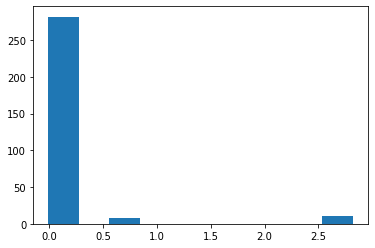

In [56]:

import matplotlib.pyplot as plt

plt.hist(csv_data['Current'])

In [60]:
df3 = csv_data[csv_data['Current']  <= 0.05]  

In [61]:
df3.describe()

,Counter,Current
count,280.000000,280.000000
mean,148.178571,-0.000369
std,83.850675,0.003626
min,0.000000,-0.008482
25%,79.750000,-0.002698
50%,149.500000,-0.000739
75%,219.250000,0.002002
max,299.000000,0.012347


(array([15., 14., 55., 69., 56., 40., 21.,  5.,  1.,  4.]),
 array([-0.00848202, -0.00639908, -0.00431614, -0.0022332 , -0.00015025,
         0.00193269,  0.00401563,  0.00609857,  0.00818151,  0.01026445,
         0.01234739]),
 <BarContainer object of 10 artists>)

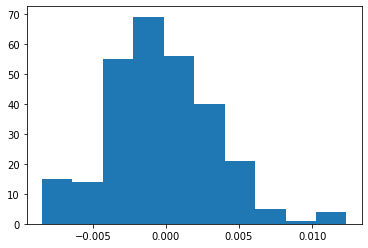

In [62]:
plt.hist(df3['Current'])

In [63]:
df4 = csv_data[csv_data['Current']  >= 0.1]  

In [64]:
df4.describe()

,Counter,Current
count,20.000000,20.000000
mean,168.000000,1.648348
std,121.614144,1.121417
min,45.000000,0.263566
25%,49.750000,0.627713
50%,168.000000,1.648314
75%,286.250000,2.732478
max,291.000000,2.820470


(array([ 2.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([0.26356581, 0.51925619, 0.77494657, 1.03063696, 1.28632734,
        1.54201773, 1.79770811, 2.05339849, 2.30908888, 2.56477926,
        2.82046965]),
 <BarContainer object of 10 artists>)

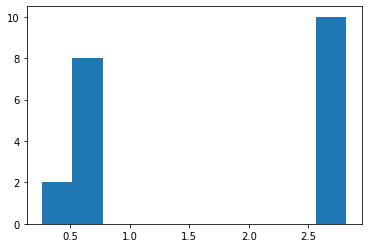

In [65]:
plt.hist(df4['Current'])

<AxesSubplot:>

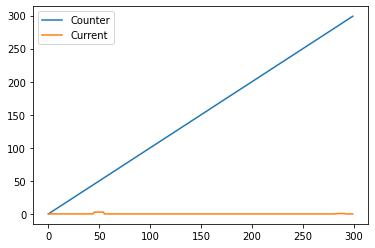

In [49]:
%matplotlib inline
csv_data.plot()

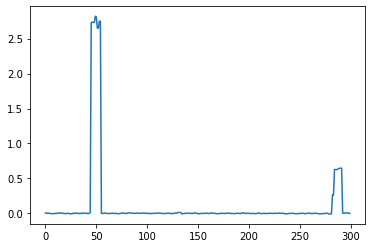

In [54]:

data_to_plot = csv_data['Current'].plot()


In [44]:
%matplotlib inline

In [ ]:
#data_plot
#plt.plot(csv_data)
#plt.title('')
#plt.xlabel('')
#plt.ylabel('')


fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
plt.show()



In [ ]:
## focus on booster current 
## implementation not finished 



from ophyd import EpicsSignal
from bluesky.suspenders import *

beam_current = bessy2.current
#beam_next_inj = bessy2_parameter.next_inj_cdwn
beam_b_current = bessy2_parameter.inj_b_current
sus_b_c = SuspendWhenOutsideBand(beam_b_current, -0.02, 0.02)
sus_b = SuspendFloor(beam_current, 297.4, resume_thresh=297.41)
RE.install_suspender(sus_b_c)
RE.install_suspender(sus_b)

RE(count([det3], 10000, delay = 0.5))

At least one suspender has tripped. The plan will begin when all suspenders are ready. Justification:
    1. Signal ring_current = 297.1745894 is below 297.4

Suspending... To get to the prompt, hit Ctrl-C twice to pause.
Suspending....To get prompt hit Ctrl-C twice to pause.
Suspension occurred at 2021-07-23 14:08:28.
Justification for this suspension:
Signal bessy2_parameter_inj_b_current = 0.5779121801470204 is outside of the range (-0.02, 0.02)
Suspender SuspendWhenOutsideBand(EpicsSignalRO(read_pv='TOPUPCC:rdCurrentB', name='bessy2_parameter_inj_b_current', parent='bessy2_parameter', value=0.0046373583504213944, timestamp=1627042113.511947, auto_monitor=False, string=False), sleep=0, pre_plan=None, post_plan=None,tripped_message=) reports a return to nominal conditions. Will sleep for 0 seconds and then release suspension at 2021-07-23 14:08:33.
Suspending....To get prompt hit Ctrl-C twice to pause.
Suspension occurred at 2021-07-23 14:08:58.
Justification for this suspension:
Sig

In [71]:
RE.stop()

Stopping: running cleanup and marking exit_status as 'success'...
+-----------+------------+------------+
generator count ['48d9c9b9'] (scan num: 1)





('48d9c9b9-a027-44a0-b16c-abb94358a101',)

Suspender SuspendWhenOutsideBand(EpicsSignalRO(read_pv='TOPUPCC:rdCurrentB', name='bessy2_parameter_inj_b_current', parent='bessy2_parameter', value=0.003920290636703692, timestamp=1626971933.444705, auto_monitor=False, string=False), sleep=0, pre_plan=None, post_plan=None,tripped_message=) reports a return to nominal conditions. Will sleep for 0 seconds and then release suspension at 2021-07-22 18:38:53.
Suspender SuspendWhenOutsideBand(EpicsSignalRO(read_pv='TOPUPCC:rdCurrentB', name='bessy2_parameter_inj_b_current', parent='bessy2_parameter', value=0.005261113576989723, timestamp=1626971963.521622, auto_monitor=False, string=False), sleep=0, pre_plan=None, post_plan=None,tripped_message=) reports a return to nominal conditions. Will sleep for 0 seconds and then release suspension at 2021-07-22 18:39:23.
Suspender SuspendWhenOutsideBand(EpicsSignalRO(read_pv='TOPUPCC:rdCurrentB', name='bessy2_parameter_inj_b_current', parent='bessy2_parameter', value=-0.007039227026045497, timestamp=